# ANOVA Case Study 3 - Variance in mileage 
An two-wheeler manufacturing company wants to study the effect of four engine tuning techniques on the mileage. The data collected is given in  Mileage.csv file. Test whether the tuning techniques impacts the mileage?

In [1]:
# Loading the relevant libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

pd.plotting.register_matplotlib_converters()
%matplotlib inline
plt.style.use('seaborn-whitegrid')
pd.set_option('display.max_columns', 500)
warnings.filterwarnings("ignore")

In [2]:
# Reading the Sales revenue data.
data = pd.read_csv('Mileage.csv')
data.head()

,Tuning_Technique,Mileage
0,1,76
1,1,72
2,1,68
3,1,66
4,2,70


In [3]:
data.groupby('Tuning_Technique')['Mileage'].describe()

,count,mean,std,min,25%,50%,75%,max
Tuning_Technique,,,,,,,,
1,4.0,70.50,4.434712,66.0,67.50,70.0,73.00,76.0
2,4.0,69.75,2.500000,67.0,68.50,69.5,70.75,73.0
3,4.0,68.00,1.414214,66.0,67.50,68.5,69.00,69.0
4,4.0,69.00,1.825742,67.0,67.75,69.0,70.25,71.0


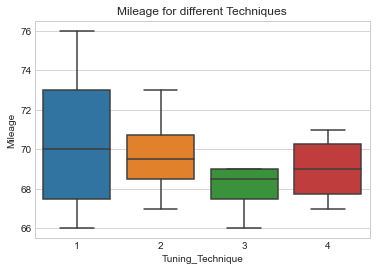

In [4]:
sns.boxplot(x = "Tuning_Technique", y = "Mileage", data = data)
plt.title('Mileage for different Techniques')
plt.show()

#### The boxplots show almost dissimilar shapes, location and spreads and there is no outlier.

### Step 1: State the null and alternative hypothesis:

* $H_0$: $\mu1$ = $\mu2$ = $\mu3$ = $\mu4$
* $H_A$: At least one $\mu$ differs 

Here $\mu1$, $\mu2$, $\mu3$ and $\mu4$ are the average mileages from tuning techniques 1, 2, 3, 4 respectively.

### Step 2: Decide the significance level
Here we select α = 0.05

### Step 3: Identify the test statistic
Here we have three groups. Analysis of variance can determine whether the means of three or more groups are different. ANOVA uses F-tests to statistically test the equality of means.

### Step 4: Calculate p value using ANOVA table
* statsmodels.formula.api.ols creates a model from a formula and dataframe
* statsmodels.api.sm.stats.anova_lm gives an Anova table for one or more fitted linear models

In [5]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('Mileage ~ Tuning_Technique', data = data).fit()
anova_table = sm.stats.anova_lm(mod, typ=2)
print(anova_table)

                   sum_sq    df         F    PR(>F)
Tuning_Technique   7.8125   1.0  1.097867  0.312488
Residual          99.6250  14.0       NaN       NaN


### Step 5:  Decide to reject or fail to reject null hypothesis
In this example, p value is 0.312488 and it is greater than our chosen level of signifance at 5%

So the decision is: We fail to reject the null hypothesis at 5% level of significance.

### So there is no statistical evidence to reject the null hypothesis that all tuning techniques result in same car mileages.